In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt

# Add project root to path
sys.path.append(os.path.abspath('..'))

from src.data_loader import DataLoader
from src.validators.data_completeness import DataCompletenessValidator

%matplotlib inline

## 1. Load Data
We load the portfolio data from the CSV file.

In [2]:
data_path = '../data/Test.csv'
loader = DataLoader(data_path)
positions, trades = loader.load_data()

print(f"Loaded {len(positions)} positions and {len(trades)} trades.")

Loaded 7721 positions and 468 trades.


## 2. Data Completeness Validation
We check for missing values (NaN) and invalid zero values in critical columns.

In [3]:
validator = DataCompletenessValidator(positions, trades)
errors = validator.validate()

print(f"Found {len(errors)} data completeness errors.")

# Convert errors to DataFrame for display
if errors:
    error_df = pd.DataFrame([vars(e) for e in errors])
    # Reorder columns for better readability
    cols = ['date', 'ticker', 'error_type', 'severity', 'description']
    display(error_df[cols])
else:
    print("No data completeness errors found.")

Found 584 data completeness errors.


,date,ticker,error_type,severity,description
0,2022-01-04,ADBE,Missing Data,Medium,Missing value for critical column: 'Close Quan...
1,2022-01-04,ADI,Missing Data,Medium,Missing value for critical column: 'Close Quan...
2,2022-01-04,NFLX,Missing Data,Medium,Missing value for critical column: 'Close Quan...
3,2022-01-04,NUE,Missing Data,Medium,Missing value for critical column: 'Close Quan...
4,2022-01-04,PLZL,Missing Data,Medium,Missing value for critical column: 'Close Quan...
...,...,...,...,...,...
579,2022-12-21,AAPL,Missing Data,Medium,Missing value for critical column: 'Close Quan...
580,2022-12-21,EXS1,Missing Data,Medium,Missing value for critical column: 'Close Quan...
581,2022-12-21,EXW1,Missing Data,Medium,Missing value for critical column: 'Close Quan...
582,2022-12-22,CELH,Missing Data,Medium,Missing value for critical column: 'Close Quan...


## 3. Analysis of Missing Data
Let's see which columns are most affected.

,Affected_Column,severity,Count
0,Close Quantity,Medium,584


<Figure size 1000x600 with 0 Axes>

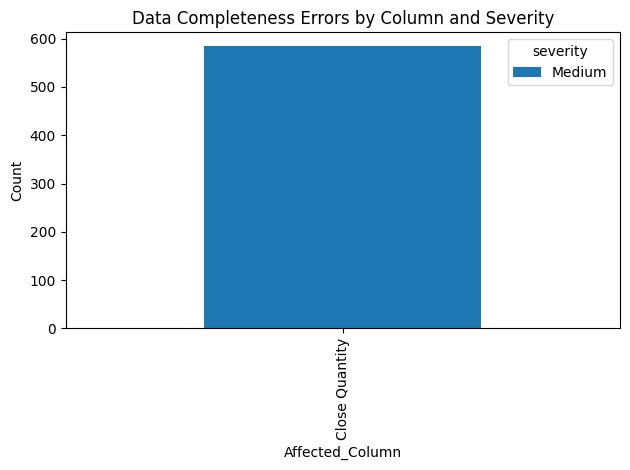

In [4]:
if errors:
    # Extract column name from description for aggregation
    # Description format: "Missing value for critical column: 'Price'"
    error_df['Affected_Column'] = error_df['description'].str.extract(r"column: '([^']+)'")
    
    summary = error_df.groupby(['Affected_Column', 'severity']).size().reset_index(name='Count')
    display(summary)
    
    # Plot
    plt.figure(figsize=(10, 6))
    summary.pivot(index='Affected_Column', columns='severity', values='Count').plot(kind='bar', stacked=True)
    plt.title('Data Completeness Errors by Column and Severity')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()